## Imports

### Torch Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
# import torch.onnx

from relaynet_pytorch.relay_net import ReLayNet
from relaynet_pytorch.data_utils import get_imdb_data
from helper import * # import helper functions

# from networks.relay_net import ReLayNet
# from networks.data_utils import get_imdb_data

torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# For reading in datasets
from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets
import torch.nn.functional as F
from helper import *
from create_labels import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Models

### Loading ReLayNet Base Model

In [20]:
# Loading ReLayNet Model
from torch.utils.serialization import load_lua
model = '/home/sim/notebooks/relaynet_pytorch/models/Exp01/relaynet_epoch20.model'
# load the model
relaynet_model = torch.load(model).cuda()

/home/sim/anaconda3/envs/py3/lib/python3.6/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/sim/anaconda3/envs/py3/lib/python3.6/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/sim/anaconda3/envs/py3/lib/python3.6/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'torch.nn.modules.activation.PReLU' has changed. you can retrieve the original source

#### Make Prediction with ReLayNet

In [21]:
def relay_out(data):
    '''
    output of relaynet - takes test data in form (1, 1, height, width)
    '''
    test_data = np.copy(data) # Copy so it doesn't alter init dimensions of data
    
    height, width = test_data.shape
    test_data.shape = (1,1,height,width) # Change dimensions of data
    out = relaynet_model(Variable(torch.cuda.FloatTensor(test_data)))
    out = F.softmax(out,dim=1)
    max_val, idx = torch.max(out,1) # torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)
    idxs = idx.data.cpu().numpy()
    return idxs

### Setting Directory

In [33]:
# Setting the directories
import os

wanted_folder = 'alldata/'
# wanted_folder = 'pruned/'
# wanted_folder = 'Atrium/'
# wanted_folder = 'Ventricle/'

cwd = os.getcwd()
check_directory = cwd
results_folder = cwd + '/results'
if check_directory == '/home/sim/notebooks/relaynet_pytorch':
    cwd = cwd + '/datasets/OCTData/'+wanted_folder
elif check_directory == '/Users/sim/Desktop/Imperial/Project/PreTrained/relaynet_pytorch':
    cwd = cwd + '/datasets-24-aug/OCTData/'+wanted_folder

print(cwd)

/home/sim/notebooks/relaynet_pytorch/datasets/OCTData/alldata/


(512, 600)


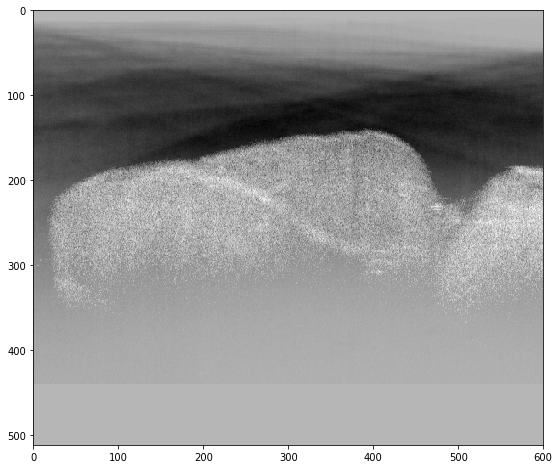

In [56]:
# filenames, raw_images = get_data(cwd+'whole_raw_image','.tif')
# filenames, raw_images = get_data(cwd+'normalised_raw_image','.png')
filenames, raw_images = get_data(cwd+'normalised_raw_2','.png')

save_name = results_folder + '/Normalised/'+ 'torch_' + 'atrven_normalised' + '.npy'

print (raw_images[0].shape)
plt.imshow(raw_images[2],cmap = "gray")

In [57]:
stored_images = []
for i in range(len(filenames)):
    out = relay_out(raw_images[i])
    out = np.squeeze(out)  
    stored_images.append(out)
stored_images = np.asarray(stored_images)

np.save(save_name,stored_images)
# idxs = label_img_to_rgb(out)
# plt.imshow(idxs)
# plt.show()